In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
print('Reading friends.txt')
with open('Data/friends.txt', 'r') as f:
    fr = eval(f.read())


print('Reading names.txt')
with open('Data/names.txt', 'r') as f:
    names = eval(f.read())

realname, personaname, levenshtein, hamming, jaro, jaro_winkler = zip(*names)
rnl = [len(s) for s in realname]
pnl = [len(s) for s in personaname]
ld  = [(lambda x: 0 if x == -1 else x)(x) for x in levenshtein]
hd  = [(lambda x: 0 if x == -1 else x)(x) for x in hamming]
jd  = [(lambda x: 0 if x == -1 else x)(x) for x in jaro]
jwd = [(lambda x: 0 if x == -1 else x)(x) for x in jaro_winkler]


print('Reading games.txt')
with open('Data/games.txt', 'r') as f:
    games = eval(f.read())

pt = [sum(t[1] for t in p) for p in games]


print('Reading achievements.txt')
with open('Data/achievements.txt', 'r') as f:
    achievements = eval(f.read())

gt, ag, at = zip(*achievements)
ap = [(lambda g, t: 0 if t == 0 else round(float(g) * 100 / float(t),2))(g, t) for g, t in zip(ag, at)]


print('Reading bans.txt')
with open('Data/bans.txt') as f:
    bans = eval(f.read())

nvb, dlb, ngb = zip(*bans)


print('Reading lastlogoff.txt')
with open('Data/lastlogoff.txt') as f:
    llo = eval(f.read())

Reading friends.txt
Reading names.txt
Reading games.txt
Reading achievements.txt
Reading bans.txt
Reading lastlogoff.txt


___

In [3]:
data, labels = [], ['amount of friends', 'last logoff', 'realname length', 'personaname length',
                    'levenshtein distance', 'hamming distance', 'jaro distance', 'jaro winkler distance',
                    'total playtime', 'games total', 'achievements gotten', 'achievements total',
                    '% achievements gotten', 'total vac bans', 'total game bans', 'days since last ban']
for z in zip(fr, llo, rnl, pnl, ld, hd, jd, jwd, pt, gt, ag, at, ap, nvb, ngb, dlb):
    data.append(z)

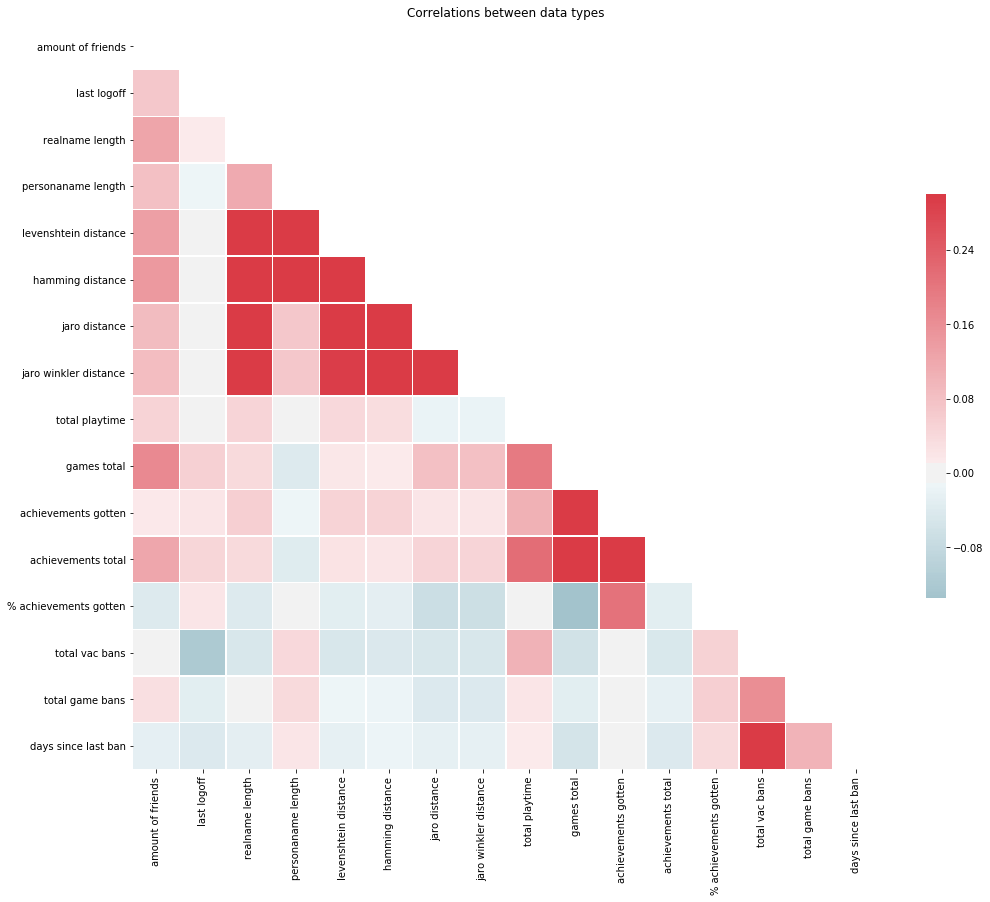

In [4]:
df = pd.DataFrame.from_records(data, columns=labels)
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


plt.figure(figsize=(15,13))
plt.title('Correlations between data types')

sns_plot = sns.heatmap(corr, cmap=cmap, mask=mask, vmax=.3, center=0, linewidths=.5, cbar_kws={"shrink":.5}, square=True)
plt.tight_layout()
plt.savefig('Figures/correlations.png')
plt.show()

___

In [5]:
data, labels = [], ['friend count', 'personaname length', 'lastlogoff',
                    'game count', 'playtime', '% achievements gotten']
for z in zip(fr, pnl, llo, gt, pt, ap):
    data.append(z)

df = pd.DataFrame.from_records(data, columns=labels)
df.to_csv('Data/train.csv', index=False)

In [6]:
pd.read_csv('Data/train.csv').head()

,friend count,personaname length,lastlogoff,game count,playtime,% achievements gotten
0,334,8,1546682249,176,556191,8.70
1,34,4,1546681613,367,198538,9.42
2,24,3,1546686911,315,369151,17.19
3,355,23,1546562943,143,208598,6.82
4,-1,15,1545817543,521,391872,4.34


In [7]:
pd.read_csv('Data/train.csv').describe()

,friend count,personaname length,lastlogoff,game count,playtime,% achievements gotten
count,1839.000000,1839.000000,1.839000e+03,1839.000000,1.839000e+03,1839.000000
mean,131.870038,9.296900,1.546204e+09,428.151713,3.128552e+05,14.326003
std,116.783502,4.964284,1.990098e+06,915.468765,6.973155e+05,11.764904
min,-1.000000,1.000000,1.517099e+09,4.000000,0.000000e+00,0.000000
25%,52.000000,6.000000,1.546558e+09,83.000000,1.233475e+05,7.575000
50%,99.000000,8.000000,1.546650e+09,200.000000,2.372840e+05,11.580000
75%,184.000000,12.000000,1.546685e+09,413.500000,3.812145e+05,17.190000
max,1082.000000,32.000000,1.546704e+09,13450.000000,2.015027e+07,97.930000
